In [1]:
import pandas as pd
import statsmodels.formula.api as smf

In [3]:
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

In [4]:
df = pd.read_csv('flat_dataframe.csv')
df1 = pd.read_csv('flat_dataframe_with_genotypes.csv')

Optimization terminated successfully.
         Current function value: 0.647421
         Iterations 6


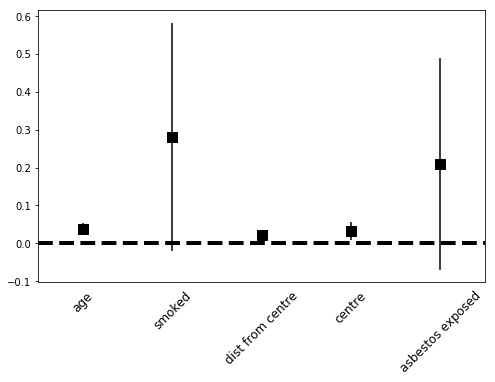

In [59]:
formula = 'case ~ age + ever_smoked + distfromcentre + centre + peto_exposed'
log_reg = smf.logit(formula, data=df).fit()
err_series = log_reg.params - log_reg.conf_int()[0]
coef_df = pd.DataFrame({'coef': log_reg.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })

fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['age', 'smoked', 'dist from centre', 'centre', 'asbestos exposed'],
                       rotation=45, fontsize=12)


Optimization terminated successfully.
         Current function value: 0.678338
         Iterations 4


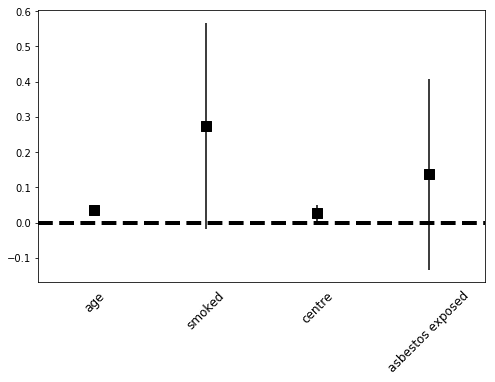

In [64]:
formula = 'case ~ age + ever_smoked + centre + peto_exposed'
log_reg = smf.logit(formula, data=df).fit()
err_series = log_reg.params - log_reg.conf_int()[0]
coef_df = pd.DataFrame({'coef': log_reg.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })

fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['age', 'smoked', 'centre', 'asbestos exposed'],
                       rotation=45, fontsize=12)


Optimization terminated successfully.
         Current function value: 0.681228
         Iterations 4


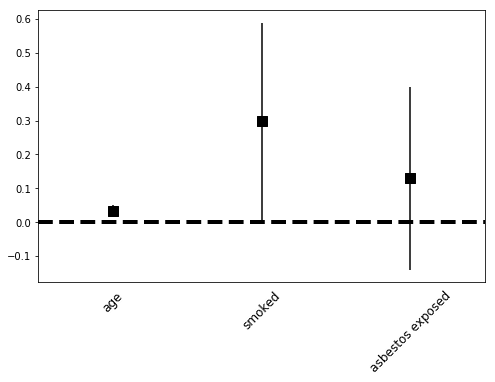

In [65]:
formula = 'case ~ age + ever_smoked + peto_exposed'
log_reg = smf.logit(formula, data=df).fit()
err_series = log_reg.params - log_reg.conf_int()[0]
coef_df = pd.DataFrame({'coef': log_reg.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })

fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['age', 'smoked', 'asbestos exposed'],
                       rotation=45, fontsize=12)


Optimization terminated successfully.
         Current function value: 0.676298
         Iterations 4


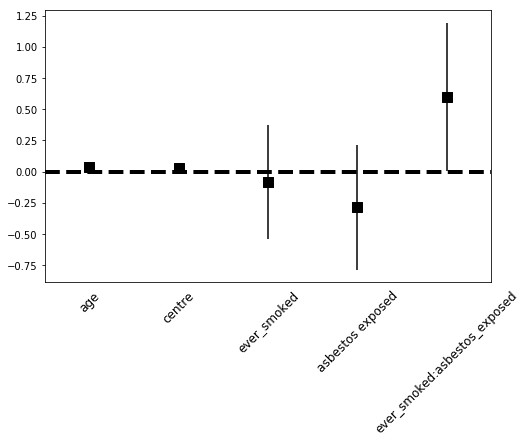

In [79]:
formula = 'case ~ age  + centre + ever_smoked*peto_exposed'
log_reg = smf.logit(formula, data=df).fit()
err_series = log_reg.params - log_reg.conf_int()[0]
coef_df = pd.DataFrame({'coef': log_reg.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })

fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['age', 'centre', 'ever_smoked', 'asbestos exposed', 'ever_smoked:asbestos_exposed'],
                       rotation=45, fontsize=12)


In [77]:
coef_df.varname.values

array(['age', 'centre', 'ever_smoked', 'peto_exposed',
       'ever_smoked:peto_exposed'], dtype=object)

Optimization terminated successfully.
         Current function value: 0.678456
         Iterations 4


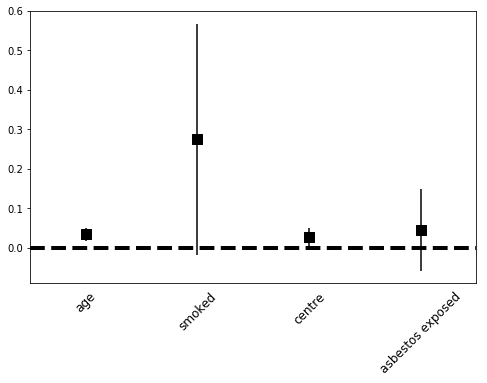

In [67]:
reorderjobcat = {1.:5 , 2.2:4, 3.:3 , 2.1:4, 2.3:4, 5.:1 , 4.:2}
df['lowest_peto_cat_reordered'] = df.lowest_peto_cat.map(reorderjobcat) # make it so highest n is highest exposed

formula = 'case ~ age + ever_smoked + centre + lowest_peto_cat_reordered'
log_reg = smf.logit(formula, data=df).fit()
err_series = log_reg.params - log_reg.conf_int()[0]
coef_df = pd.DataFrame({'coef': log_reg.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })

fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['age', 'smoked', 'centre', 'asbestos exposed'],
                       rotation=45, fontsize=12)

Optimization terminated successfully.
         Current function value: 0.681302
         Iterations 4


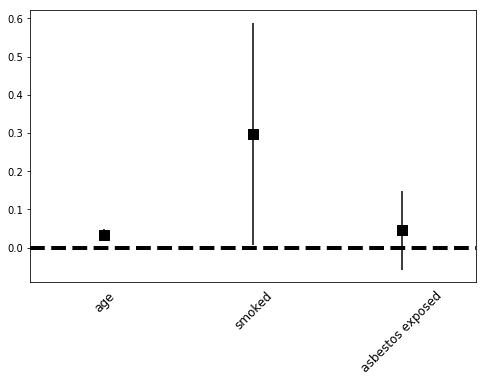

In [66]:
reorderjobcat = {1.:5 , 2.2:4, 3.:3 , 2.1:4, 2.3:4, 5.:1 , 4.:2}
df['lowest_peto_cat_reordered'] = df.lowest_peto_cat.map(reorderjobcat) # make it so highest n is highest exposed

formula = 'case ~ age + ever_smoked + lowest_peto_cat_reordered'
log_reg = smf.logit(formula, data=df).fit()
err_series = log_reg.params - log_reg.conf_int()[0]
coef_df = pd.DataFrame({'coef': log_reg.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })

fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['age', 'smoked', 'asbestos exposed'],
                       rotation=45, fontsize=12)


Optimization terminated successfully.
         Current function value: 0.678541
         Iterations 5


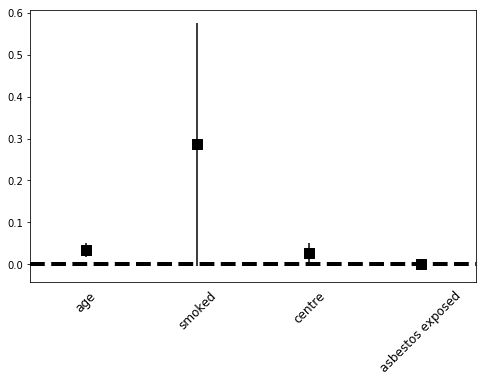

In [68]:
formula = 'case ~ age + ever_smoked + centre +  fibre_ml_exposure'
log_reg = smf.logit(formula, data=df).fit()
err_series = log_reg.params - log_reg.conf_int()[0]
coef_df = pd.DataFrame({'coef': log_reg.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })

fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['age', 'smoked', 'centre', 'asbestos exposed'],
                       rotation=45, fontsize=12)

Optimization terminated successfully.
         Current function value: 0.678075
         Iterations 5


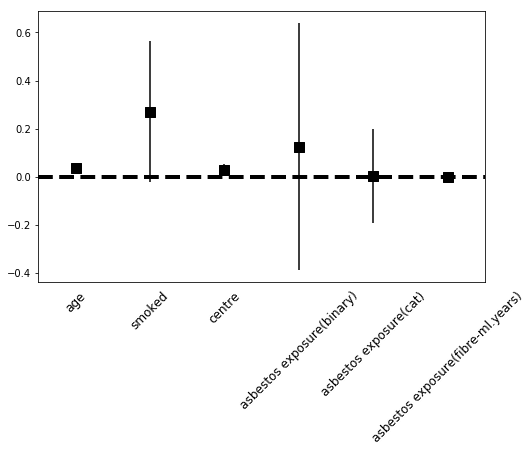

In [70]:
reorderjobcat = {1.:5 , 2.2:4, 3.:3 , 2.1:4, 2.3:4, 5.:1 , 4.:2}
df['lowest_peto_cat_reordered'] = df.lowest_peto_cat.map(reorderjobcat) # make it so highest n is highest exposed
formula = 'case ~ age + ever_smoked + centre + peto_exposed + lowest_peto_cat_reordered + fibre_ml_exposure'
log_reg = smf.logit(formula, data=df).fit()
err_series = log_reg.params - log_reg.conf_int()[0]
coef_df = pd.DataFrame({'coef': log_reg.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })

fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['age', 'smoked', 'centre', 'asbestos exposure(binary)', 'asbestos exposure(cat)', 'asbestos exposure(fibre-ml.years)' ],
                       rotation=45, fontsize=12)

Optimization terminated successfully.
         Current function value: 0.596523
         Iterations 5


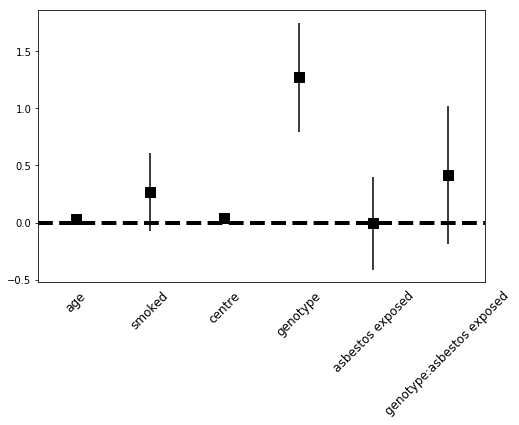

In [73]:
formula = 'case ~ age + ever_smoked + centre + genotype*peto_exposed'
log_reg = smf.logit(formula, data=df1).fit()
err_series = log_reg.params - log_reg.conf_int()[0]
coef_df = pd.DataFrame({'coef': log_reg.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })

fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['age', 'smoked', 'centre', 'genotype', 'asbestos exposed', 'genotype:asbestos exposed'],
                       rotation=45, fontsize=12)

Optimization terminated successfully.
         Current function value: 0.596523
         Iterations 5


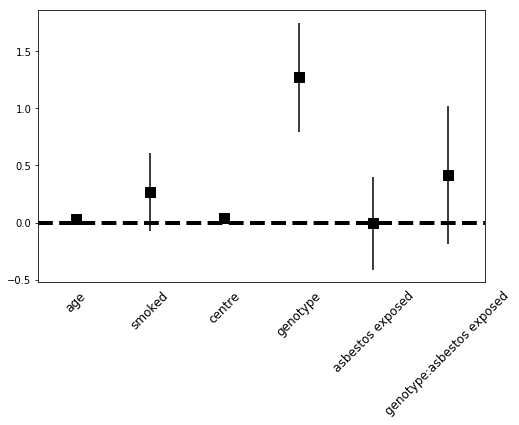

In [81]:
formula = 'case ~ age + ever_smoked + centre + genotype*peto_exposed'
log_reg = smf.logit(formula, data=df1).fit()
err_series = log_reg.params - log_reg.conf_int()[0]
coef_df = pd.DataFrame({'coef': log_reg.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })

fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['age', 'smoked', 'centre', 'genotype', 'asbestos exposed', 'genotype:asbestos exposed'],
                       rotation=45, fontsize=12)

Optimization terminated successfully.
         Current function value: 0.596523
         Iterations 5


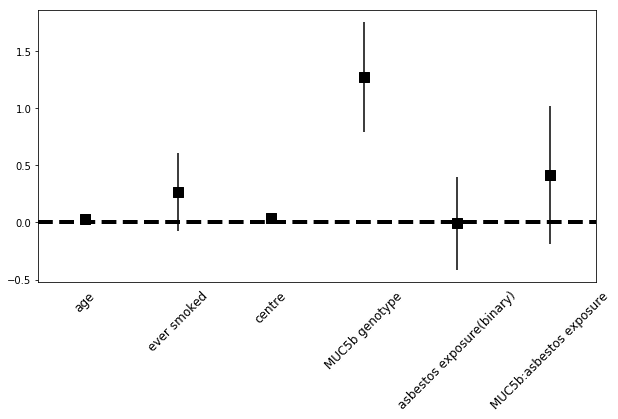

In [128]:
formula = 'case ~ age + ever_smoked + centre + genotype*peto_exposed'
log_reg = smf.logit(formula, data=df1).fit()
err_series = log_reg.params - log_reg.conf_int()[0]
coef_df = pd.DataFrame({'coef': log_reg.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })

fig, ax = plt.subplots(figsize=(10, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['age', 'ever smoked', 'centre', 'MUC5b genotype', 'asbestos exposure(binary)',
       'MUC5b:asbestos exposure'],
                       rotation=45, fontsize=12)

In [133]:
import numpy as np
coef_df['or'] = np.exp(coef_df['coef'])
coef_df

,coef,err,varname,or
0,0.029437,0.018725,age,1.029875
1,0.269230,0.342388,ever_smoked,1.308956
2,0.039641,0.027338,centre,1.040437
3,1.271835,0.477162,genotype,3.567393
4,-0.004956,0.406856,peto_exposed,0.995056
5,0.415773,0.600788,genotype:peto_exposed,1.515542


Optimization terminated successfully.
         Current function value: 0.596670
         Iterations 5


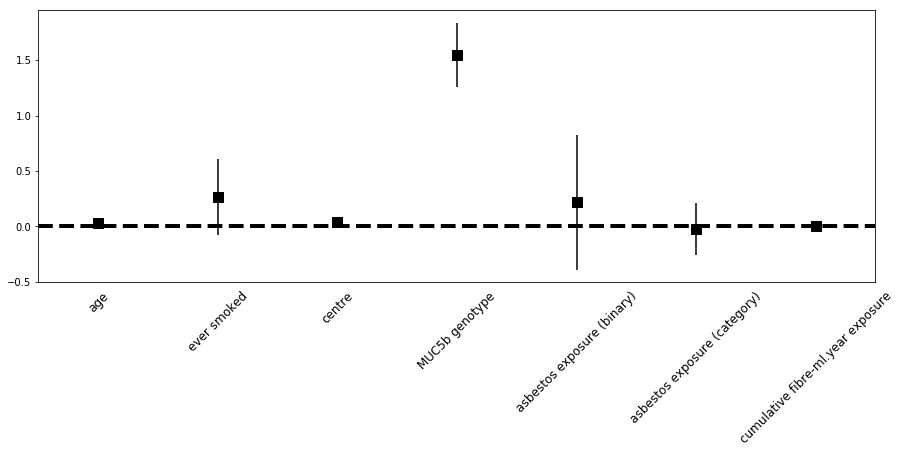

In [127]:
formula = 'case ~ age + ever_smoked + centre + genotype + peto_exposed + lowest_peto_cat_reordered + fibre_ml_exposure'
log_reg = smf.logit(formula, data=df1).fit()
err_series = log_reg.params - log_reg.conf_int()[0]
coef_df = pd.DataFrame({'coef': log_reg.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })

fig, ax = plt.subplots(figsize=(15, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['age', 'ever smoked', 'centre', 'MUC5b genotype', 'asbestos exposure (binary)',
       'asbestos exposure (category)', 'cumulative fibre-ml.year exposure'],
                       rotation=45, fontsize=12)

In [134]:
df.columns

Index(['ipfjes_id', 'case', 'dob', 'age', 'yob', 'agegroup', 'ethnicity',
       'ever_smoked', 'current_smoker', 'packyrs', 'participant_id', 'centre',
       'gp_coords', 'centre_coords', 'distfromcentre', 'ct', 'bx', 'fhx',
       'amiodarone', 'flecainade', 'nitrofurantoin', 'azathioprine',
       'gefitinib', 'ifosfamide', 'melphalan', 'rituximab', 'mrc0', 'mrc1',
       'mrc2', 'mrc3', 'mrc4', 'pc_sob', 'pc_cough', 'pc_incidental',
       'pc_incidental_desc', 'pc_other', 'comments', 'mrc_score',
       'peto_exposed', 'exposed_stone', 'exposed_wood', 'exposed_metal',
       'exposed_farm', 'exposed_asbestos', 'peto_dose', 'median_ssec',
       'fibre_ml_exposure', 'lowest_peto_cat', 'peto_shortlist',
       'coggan_shortlist', 'mean_pmr', 'highest_pmr', 'meso_pmr_dose',
       'agecat', 'ethcat', 'ctcat', 'bxcat', 'centre_name',
       'Aberdeen Royal Infirmary',
       'Aintree University Hospitals NHS Foundation Trust',
       'Glasgow Royal Infirmary', 'Guys’ and St Thomas’ N

In [135]:
formula = 'mrc_score ~ age + ever_smoked + fibre_ml_exposure'
lin_reg = smf.ols(formula, data=df).fit()
lin_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mrc_score   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     21.54
Date:                Wed, 25 Dec 2019   Prob (F-statistic):           1.66e-13
Time:                        15:50:25   Log-Likelihood:                -1535.4
No. Observations:                 960   AIC:                             3079.
Df Residuals:                     956   BIC:                             3098.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.0676      0.363     -2.939      0.003      -1.780      -0.355
age                   0.0306      0.005      6.507      0.000       0.021       0.040
ever_smoked           0.4365      0.087      4.992      0.000       0.265       0.608
fibre_ml_exposure  1.348e-05    1.7e-05      0.795      0.427   -1.98e-05    4.68e-05
==============================================================================
Omnibus:                      415.709   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.570
Skew:                           0.075   Prob(JB):                     6.33e-12
Kurtosis:                       1.875   Cond. No.                     2.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""